In [1]:
import yfinance as yf 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker="AAPL"
data=yf.download(ticker, start='2010-01-01') ['Adj Close']
data.head()

[*********************100%%**********************]  1 of 1 completed


Date
2010-01-04    6.461977
2010-01-05    6.473149
2010-01-06    6.370186
2010-01-07    6.358408
2010-01-08    6.400681
Name: Adj Close, dtype: float64

In [3]:
log_returns=np.log(1+data.pct_change())

In [4]:
log_returns

Date
2010-01-04         NaN
2010-01-05    0.001727
2010-01-06   -0.016034
2010-01-07   -0.001851
2010-01-08    0.006626
                ...   
2024-07-24   -0.029176
2024-07-25   -0.004816
2024-07-26    0.002159
2024-07-29    0.001284
2024-07-30    0.002563
Name: Adj Close, Length: 3667, dtype: float64

<Axes: xlabel='Date'>

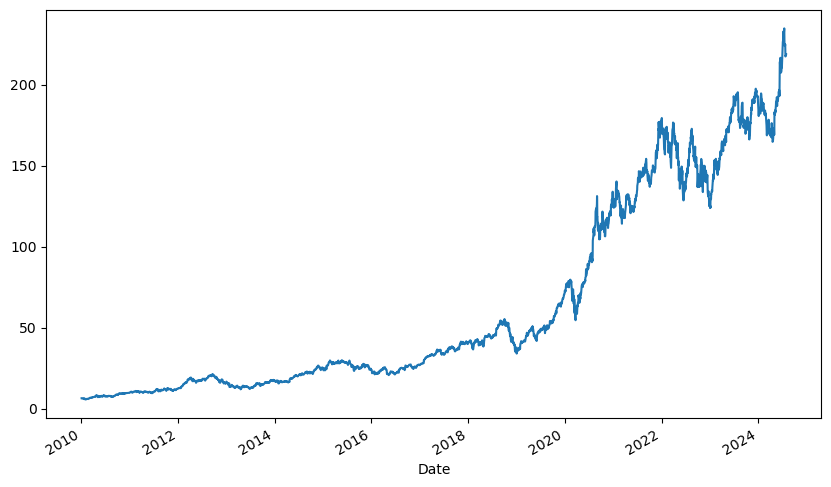

In [5]:
data.plot(figsize=(10, 6))

In [8]:
u= log_returns.mean()

In [9]:
u

0.0009607809190905206

In [10]:
var= log_returns.var()
var

0.0003127515208076576

In [11]:
drift= u-(0.5*var)
drift

0.0008044051586866918

In [12]:
stdev=log_returns.std()
stdev

0.017684782181515767

In [13]:
drift = np.array([drift])
drift_values = drift
print(drift_values)

[0.00080441]


In [14]:
stdev_array = np.array([stdev])
stdev_values = stdev_array
print(stdev_values)


[0.01768478]


In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x=np.random.rand(10,2)
x

array([[0.80221317, 0.13871185],
       [0.80652575, 0.55093968],
       [0.2109651 , 0.11805802],
       [0.43922658, 0.42084395],
       [0.90644959, 0.63172578],
       [0.36009145, 0.10578331],
       [0.97408152, 0.90217601],
       [0.03082534, 0.33572627],
       [0.49975081, 0.5477187 ],
       [0.61771554, 0.22697908]])

In [17]:
norm.ppf(x)

array([[ 8.49552992e-01, -1.08612497e+00],
       [ 8.65164496e-01,  1.28035798e-01],
       [-8.03077048e-01, -1.18475066e+00],
       [-1.52930407e-01, -1.99734921e-01],
       [ 1.31920432e+00,  3.36427592e-01],
       [-3.58214363e-01, -1.24926924e+00],
       [ 1.94448527e+00,  1.29405049e+00],
       [-1.86879970e+00, -4.24155334e-01],
       [-6.24636245e-04,  1.19899701e-01],
       [ 2.99486441e-01, -7.48832517e-01]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.09311673, -1.71783027],
       [-0.78670309,  0.78182729],
       [ 1.76380598, -0.71193494],
       [ 0.20881922, -0.37798748],
       [-1.63719175,  1.66010083],
       [-0.01621513, -1.36731598],
       [-1.03015454, -0.04472364],
       [-0.26287183,  0.70207622],
       [ 0.59524776, -0.23866003],
       [-0.23256414,  0.7559308 ]])

In [19]:
import numpy as np
from scipy.stats import norm

# Define your drift and stdev as floats
drift = 0.0008044051586866918  # example value, replace with your actual drift
stdev =0.017684782181515767  # example value, replace with your actual stdev

t_intervals = 1000
iterations = 10

# Generate daily returns
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

print(daily_returns)

[[0.98343871 0.98359354 1.02087345 ... 0.99938823 0.99204179 0.99613803]
 [0.99917532 0.9782238  1.00551224 ... 1.00261554 0.99898164 1.00165542]
 [0.95376494 0.98275736 1.00239043 ... 1.00173431 0.98329492 1.01953692]
 ...
 [1.02559539 0.97777426 1.01863106 ... 0.97458091 0.98886155 0.9829853 ]
 [1.01613261 1.02003693 0.99703126 ... 0.99602911 1.01837828 1.00735521]
 [0.96759878 0.95153097 1.00218693 ... 1.03450518 0.99740079 0.99750806]]


In [20]:
S0=data.iloc[-1]
S0

218.8000030517578

In [21]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
price_list[0] = S0
price_list

array([[218.80000305, 218.80000305, 218.80000305, ..., 218.80000305,
        218.80000305, 218.80000305],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [24]:
for t in range(1, t_intervals):
    price_list[t]=price_list[t-1]*daily_returns[t]
price_list

array([[ 218.80000305,  218.80000305,  218.80000305, ...,  218.80000305,
         218.80000305,  218.80000305],
       [ 218.61956407,  214.03537095,  220.00608205, ...,  219.37228286,
         218.57718548,  219.16220842],
       [ 208.51167587,  210.34483637,  220.53199076, ...,  219.75274345,
         214.92583699,  223.44396383],
       ...,
       [ 618.10205529,  396.28418427,  210.10393338, ..., 1054.64927653,
         445.92736233,  961.23512582],
       [ 628.07365302,  404.22450425,  209.48018984, ..., 1050.46138172,
         454.12274053,  968.3052165 ],
       [ 607.72329742,  384.63213286,  209.93830817, ..., 1086.70774552,
         452.94238128,  965.89225734]])

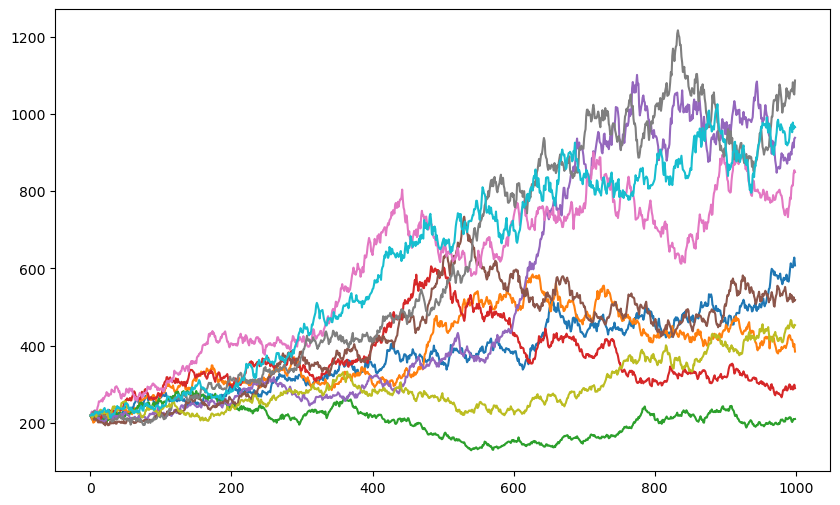

In [25]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

In [26]:
# Assuming price_list is a numpy array or a pandas Series with 1000 daily prices
import numpy as np

# Simulate generating price_list for demonstration purposes
np.random.seed(42)
t_intervals = 1000
initial_price = 219
daily_returns = np.random.normal(1.0001, 0.01, t_intervals)
price_list = np.zeros(t_intervals)
price_list[0] = initial_price

for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

# Calculate the index for the last day of 2025
days_2024 = 366  # Leap year
days_2025 = 365
end_of_2025_index = days_2024 + days_2025 - 1

# Get the price at the end of 2025
price_end_of_2025 = price_list[end_of_2025_index]

# Print the price at the end of 2025
print("Price at the end of 2025:", price_end_of_2025)

Price at the end of 2025: 204.66043078605932
